In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.regression.linear_model as sm
import numpy as np

In [2]:
data1 = pd.read_csv('/home/lionex/bin/Python/Machine-Learning-Lab/Datasets/car_purchasing.csv', encoding='ISO-8859-1')
data1.shape
data1.head()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


<Axes: >

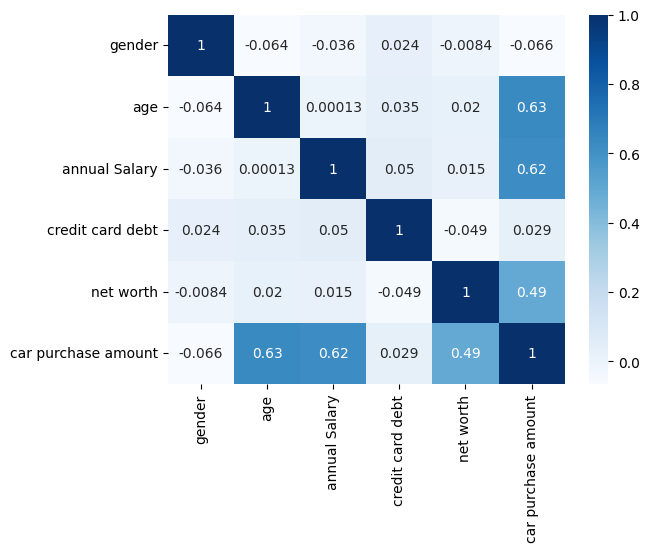

In [3]:
sns.heatmap(data1.corr(),cmap='Blues', annot=True)

In [4]:
X = data1[['age','annual Salary', 'net worth']]
y = data1['car purchase amount']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=21)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
print('Mean Squared Error='+str(mse))
print('Efficiency of Model='+str(r2))

Mean Squared Error=2.314243958907386
Efficiency of Model=0.9999999791592223


In [5]:
data = pd.read_csv('/home/lionex/bin/Python/Machine-Learning-Lab/Datasets/Position_Salaries.csv', encoding='ISO-8859-1')
data.shape
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


<Axes: >

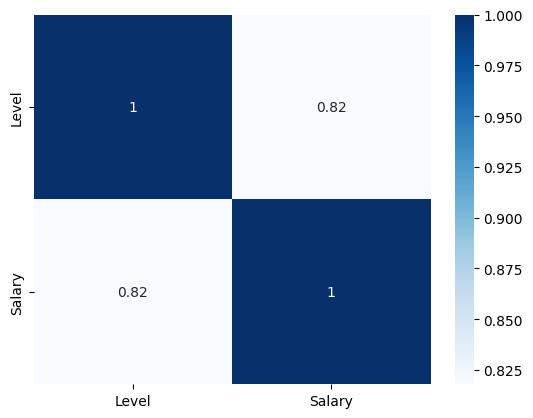

In [6]:
sns.heatmap(data.corr(),cmap='Blues', annot=True)

In [7]:
X = data.iloc[:,1:2].values
y = data.iloc[:,2].values
poly = PolynomialFeatures(degree = 4)
p = poly.fit_transform(X)
poly.fit(p, y)
model = LinearRegression()
model.fit(p,y)

LinearRegression()

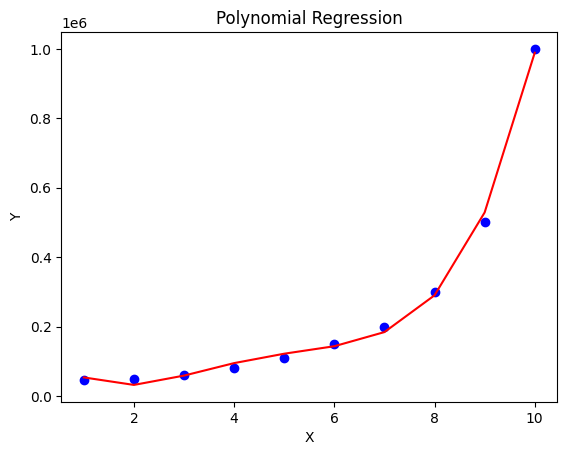

In [8]:
plt.scatter(X, y, color = 'blue')
plt.plot(X, model.predict(p), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [9]:
data2 = pd.read_csv('/home/lionex/bin/Python/Machine-Learning-Lab/Datasets/50_Startups.csv')
data2.head(5)
data2.shape

(50, 5)

<Axes: >

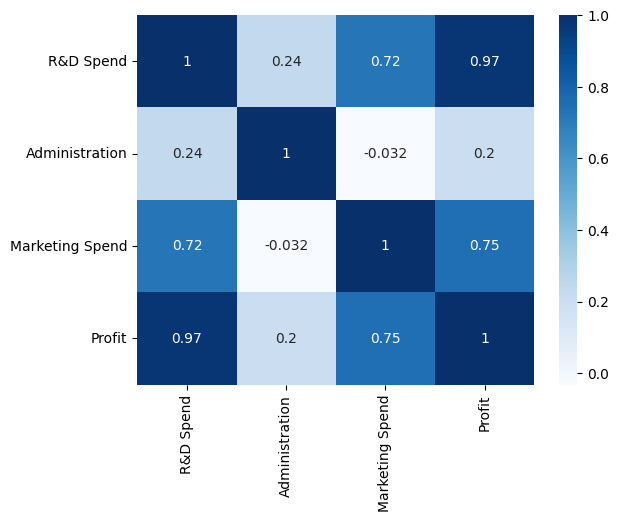

In [10]:
sns.heatmap(data2.corr(),cmap='Blues',annot=True)

In [11]:
x1 = pd.get_dummies(data2[['R&D Spend', 'Administration', 'Marketing Spend', 'State']])
x1.head(5)
y1 = data2['Profit']
X_train, X_test, y_train, y_test = train_test_split(x1,y1,test_size=0.3,random_state=4)
model1 = LinearRegression()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
mse1 = mean_squared_error(y_pred,y_test)
r21 = r2_score(y_pred,y_test)
print('Mean Squared Error='+str(mse1))
print('Efficiency of Model='+str(r21))

Mean Squared Error=88456329.66344424
Efficiency of Model=0.9106288638054402


In [12]:
x1 = np.append(arr = np.ones((50, 1)).astype(int),values = x1, axis = 1)
opt = x1[:, [0, 1, 2, 3, 4, 5]]
ols = sm.OLS(endog = y1, exog = opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           1.34e-27
Time:                        00:12:54   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
x1             0.8060      0.046     17.369      0.000       0.712       0.900
x2            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x3             0.0270      0.017      1.574      0.123      -0.008       0.062
x4            41.8870   3256.039      0.013      0.990   -6520.229    6604.003
x5           240.6758   3338.857      0.072      0.943   -6488.349    6969.701
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
opt = x1[:, [0, 1, 2, 3, 5]]
ols = sm.OLS(endog = y1, exog = opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           8.49e-29
Time:                        00:12:57   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1             0.8060      0.046     17.606      0.000       0.714       0.898
x2            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x3             0.0270      0.017      1.592      0.118      -0.007       0.061
x4           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
opt = x1[:, [0, 1, 2, 3]]
ols = sm.OLS(endog = y1, exog = opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           4.53e-30
Time:                        00:13:00   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
X_train, X_test, y_train, y_test = train_test_split(opt,y1,test_size=0.3,random_state=3)
model1 = LinearRegression()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
print('Test Data')
mse1 = mean_squared_error(y_pred,y_test)
r21 = r2_score(y_pred,y_test)
adjr2 = 1 - ((1 - r2) * (len(data2) - 1) / (len(data2) - len(x1) - 1))
print('Mean Squared Error='+str(mse1))
print('Efficiency of Model='+str(r21))
print('Adjusted R2='+str(adjr2))

Test Data
Mean Squared Error=109372381.72175032
Efficiency of Model=0.9318095070765943
Adjusted R2=1.0000010211981052


In [16]:
y_pred = model1.predict(X_train)
mse1 = mean_squared_error(y_pred,y_train)
r21 = r2_score(y_pred,y_train)
print('Train Data')
adjr2 = 1 - ((1 - r2) * (len(data2) - 1) / (len(data2) - len(y1) - 1))
print('Mean Squared Error='+str(mse1))
print('Efficiency of Model='+str(r21))
print('Adjusted R2='+str(adjr2))

Train Data
Mean Squared Error=76252540.75219429
Efficiency of Model=0.9503836407215878
Adjusted R2=1.0000010211981052
